# Group 2 Final Project

### Sahil Gauba, Vatsal Patel, Ben Wachtel

####  

### Loading in Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #advanced package
import seaborn as sns #advanced package

C:\Users\Ben.DESKTOP-KAJ78R5\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading in Data Set and Filtering

In [3]:
spi_matches = pd.read_csv("spi_matches.csv",delimiter=',',header=0)
spi_matches.shape

(68913, 23)

In [4]:
spi_matches.dtypes

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

In [5]:
spi_matches.head

<bound method NDFrame.head of        season        date  league_id                   league  \
0        2016  2016-07-09       7921  FA Women's Super League   
1        2016  2016-07-10       7921  FA Women's Super League   
2        2016  2016-07-10       7921  FA Women's Super League   
3        2016  2016-07-16       7921  FA Women's Super League   
4        2016  2016-07-17       7921  FA Women's Super League   
...       ...         ...        ...                      ...   
68908    2023  2023-12-03       2105       Brasileiro Série A   
68909    2023  2023-12-03       2105       Brasileiro Série A   
68910    2023  2023-12-03       2105       Brasileiro Série A   
68911    2023  2023-12-03       2105       Brasileiro Série A   
68912    2023  2023-12-03       2105       Brasileiro Série A   

                  team1                team2   spi1   spi2   prob1   prob2  \
0       Liverpool Women              Reading  51.56  50.42  0.4389  0.2767   
1         Arsenal Women  Notts Co

This match data contains data from 40 different men's and women's league. Our focus was on the men's Champions League and the leagues that make up the Champions League.

Filtering to only have the following leagues:

-Barclays Premier League

-French Ligue 1

-German Bundesliga

-Italy Serie A

-Spanish Primera Division

-UEFA Champions League


In [6]:
league_list = ['Barclays Premier League','French Ligue 1','German Bundesliga','Italy Serie A','Spanish Primera Division',\
              'UEFA Champions League']

spi_data = spi_matches[spi_matches['league'].isin(league_list)]
spi_data.shape

(13651, 23)

We see there are NA values in certain rows, removing them because it makes up a small proportion of the data set

In [7]:
spi_data.isna().sum()

season           0
date             0
league_id        0
league           0
team1            0
team2            0
spi1             0
spi2             0
prob1            0
prob2            0
probtie          0
proj_score1      0
proj_score2      0
importance1    480
importance2    480
score1         101
score2         101
xg1            107
xg2            107
nsxg1          107
nsxg2          107
adj_score1     107
adj_score2     107
dtype: int64

In [8]:
spi_data = spi_data.dropna()
spi_data.shape

(13155, 23)

In [9]:
spi_data.describe()

season     league_id          spi1          spi2         prob1  \
count  13155.000000  13155.000000  13155.000000  13155.000000  13155.000000   
mean    2019.070848   1962.433067     68.019915     67.968870      0.450016   
std        1.980097    224.024954     11.598243     11.627102      0.180691   
min     2016.000000   1818.000000     36.340000     36.350000      0.027000   
25%     2017.000000   1845.000000     59.250000     59.160000      0.332800   
50%     2019.000000   1854.000000     67.520000     67.450000      0.439200   
75%     2021.000000   1869.000000     76.010000     76.025000      0.554900   
max     2022.000000   2411.000000     96.570000     96.690000      0.977500   

              prob2       probtie   proj_score1   proj_score2   importance1  \
count  13155.000000  13155.000000  13155.000000  13155.000000  13155.000000   
mean       0.307315      0.242670      1.543816      1.200010     36.420753   
std        0.165763      0.048791      0.480890      0.478699     27.132249   
min        0.003700      0.000000      0.240000      0.200000      0.000000   
25%        0.195000      0.223000      1.230000      0.880000     14.400000   
50%        0.284700      0.254700      1.450000      1.120000     33.700000   
75%        0.395300      0.274900      1.760000      1.430000     53.900000   
max        0.881600      0.345500      4.030000      3.430000    100.000000   

        importance2        score1        score2           xg1           xg2  \
count  13155.000000  13155.000000  13155.000000  13155.000000  13155.000000   
mean      35.645420      1.551729      1.244926      1.566276      1.268884   
std       26.770472      1.318963      1.186080      0.897232      0.807589   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.700000      1.000000      0.000000      0.900000      0.670000   
50%       32.900000      1.000000      1.000000      1.420000      1.120000   
75%       53.400000      2.000000      2.000000      2.070000      1.710000   
max      100.000000      9.000000      9.000000      7.070000      5.930000   

              nsxg1         nsxg2    adj_score1    adj_score2  
count  13155.000000  13155.000000  13155.000000  13155.000000  
mean       1.439548      1.186797      1.553761      1.255941  
std        0.717090      0.634667      1.288344      1.165738  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.940000      0.740000      1.050000      0.000000  
50%        1.320000      1.070000      1.050000      1.050000  
75%        1.800000      1.510000      2.100000      2.100000  
max        6.890000      5.920000      8.820000      7.230000

### Which teams progressed or regressed in terms of SPI from 2016-2022?

In [10]:
# Step 2: Data Cleaning and Preparation

# Drop columns that are not required for SPI analysis
spi_data_relevant = spi_data[['season', 'team1', 'team2', 'spi1', 'spi2']]

# Calculate the average SPI for each team in each season
# This is done because a team plays multiple matches in a season, and we want the average SPI
spi_avg_season = spi_data_relevant.groupby(['season', 'team1']).spi1.mean().reset_index()
spi_avg_season = spi_avg_season.rename(columns={'team1': 'team', 'spi1': 'avg_spi'})

# Now, calculate the SPI change for each team from one season to the next
spi_avg_season['spi_change'] = spi_avg_season.groupby('team')['avg_spi'].diff()

# Drop rows with NaN values in 'spi_change' (this will happen for the first season for each team)
spi_avg_season.dropna(subset=['spi_change'], inplace=True)

# Display the transformed data
print(spi_avg_season.head())

# Note: This code assumes that each team's SPI is adequately represented by its average value in a season.
# If this assumption doesn't hold for your analysis, you might need a different approach to calculate SPI change.


     season             team    avg_spi  spi_change
98     2017         AC Milan  70.847778    3.261667
99     2017  AFC Bournemouth  56.136842   -4.651393
100    2017        AS Monaco  76.350000   -1.638824
101    2017          AS Roma  79.816667    1.103333
102    2017           Alavés  65.679474   -1.021637


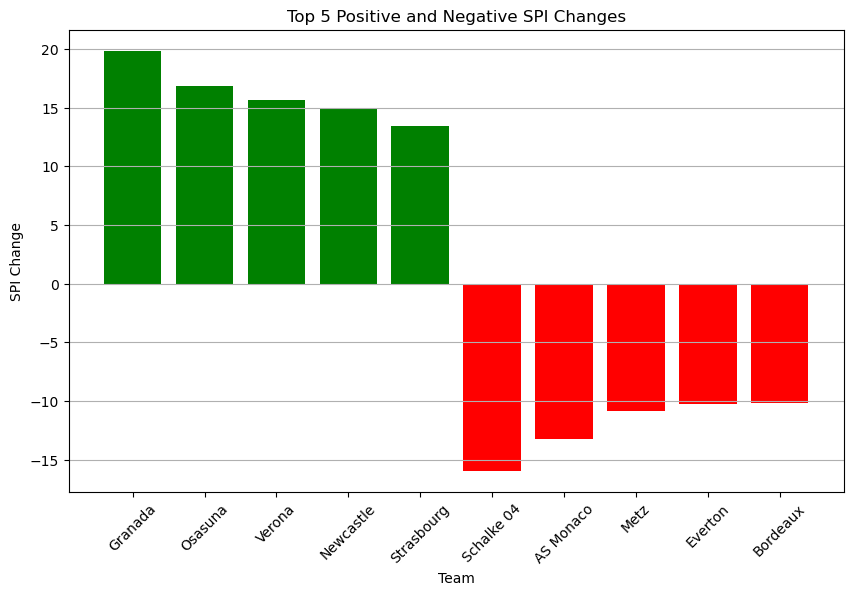

In [11]:
# Preparing the data
spi_data_relevant = spi_data[['season', 'team1', 'team2', 'spi1', 'spi2']]
spi_avg_season = spi_data_relevant.groupby(['season', 'team1']).spi1.mean().reset_index()
spi_avg_season = spi_avg_season.rename(columns={'team1': 'team', 'spi1': 'avg_spi'})
spi_avg_season['spi_change'] = spi_avg_season.groupby('team')['avg_spi'].diff()
spi_avg_season.dropna(subset=['spi_change'], inplace=True)
spi_avg_season['abs_spi_change'] = spi_avg_season['spi_change'].abs()

# Find the teams with the largest absolute SPI changes
significant_spi_changes = spi_avg_season.sort_values('abs_spi_change', ascending=False).head(3)
selected_teams = significant_spi_changes['team'].unique()

# Bar Chart for Top SPI Changes
top_positive_changes = spi_avg_season.sort_values('spi_change', ascending=False).head(5)
top_negative_changes = spi_avg_season.sort_values('spi_change').head(5)
top_changes = pd.concat([top_positive_changes, top_negative_changes])

plt.figure(figsize=(10, 6))
plt.bar(top_changes['team'], top_changes['spi_change'], 
        color=['green' if x > 0 else 'red' for x in top_changes['spi_change']])
plt.xlabel('Team')
plt.ylabel('SPI Change')
plt.title('Top 5 Positive and Negative SPI Changes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

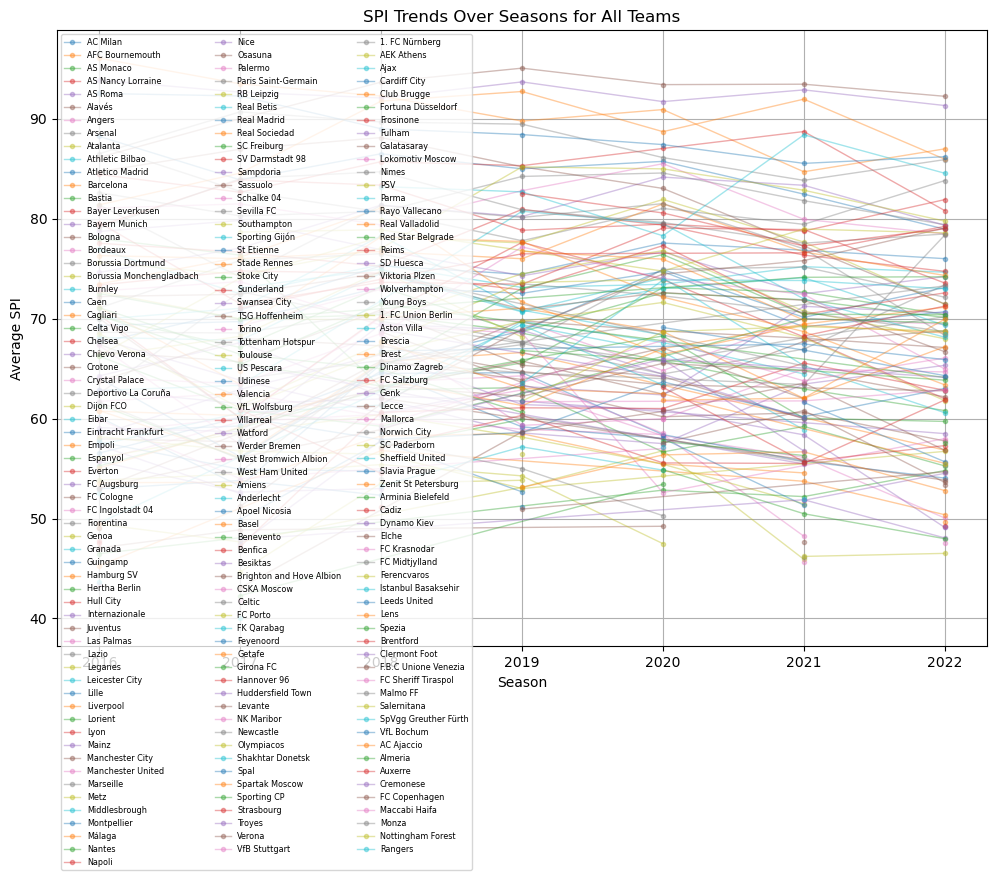

In [12]:
spi_data_relevant = spi_data[['season', 'team1', 'spi1']]
spi_all_teams = spi_data_relevant.groupby(['season', 'team1']).spi1.mean().reset_index()
spi_all_teams = spi_all_teams.rename(columns={'team1': 'team', 'spi1': 'avg_spi'})

# Plotting SPI trends for all teams
plt.figure(figsize=(12, 8))

for team in spi_all_teams['team'].unique():
    team_data = spi_all_teams[spi_all_teams['team'] == team]
    plt.plot(team_data['season'], team_data['avg_spi'], label=team, marker='.', linestyle='-', linewidth=1, alpha=0.4)

plt.xlabel('Season')
plt.ylabel('Average SPI')
plt.title('SPI Trends Over Seasons for All Teams')
plt.legend(loc='upper left', ncol=3, fontsize='xx-small')
plt.grid(True)
plt.show()

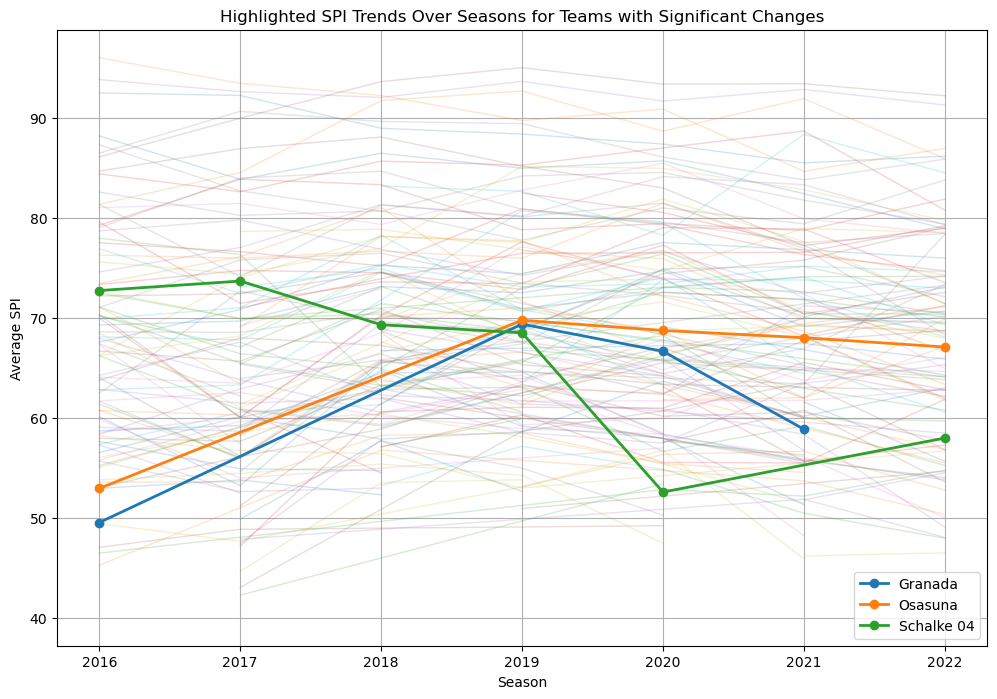

In [13]:
# Calculate the SPI change for each team from one season to the next and the absolute change
spi_all_teams['spi_change'] = spi_all_teams.groupby('team')['avg_spi'].diff()
spi_all_teams['abs_spi_change'] = spi_all_teams['spi_change'].abs()

# Find the teams with the largest absolute SPI changes
significant_spi_changes = spi_all_teams.sort_values('abs_spi_change', ascending=False).head(3)
selected_teams = significant_spi_changes['team'].unique()

# Plotting SPI trends for teams with significant changes
plt.figure(figsize=(12, 8))

# Plot a lighter line for all teams for context
for team in spi_all_teams['team'].unique():
    team_data = spi_all_teams[spi_all_teams['team'] == team]
    plt.plot(team_data['season'], team_data['avg_spi'], label='_nolegend_', marker='', linestyle='-', linewidth=1, alpha=0.2)

# Now, plot a highlighted line for teams with significant changes
for team in selected_teams:
    team_data = spi_all_teams[spi_all_teams['team'] == team]
    plt.plot(team_data['season'], team_data['avg_spi'], label=team, marker='o', linestyle='-', linewidth=2)

plt.xlabel('Season')
plt.ylabel('Average SPI')
plt.title('Highlighted SPI Trends Over Seasons for Teams with Significant Changes')
plt.legend()
plt.grid(True)
plt.show()


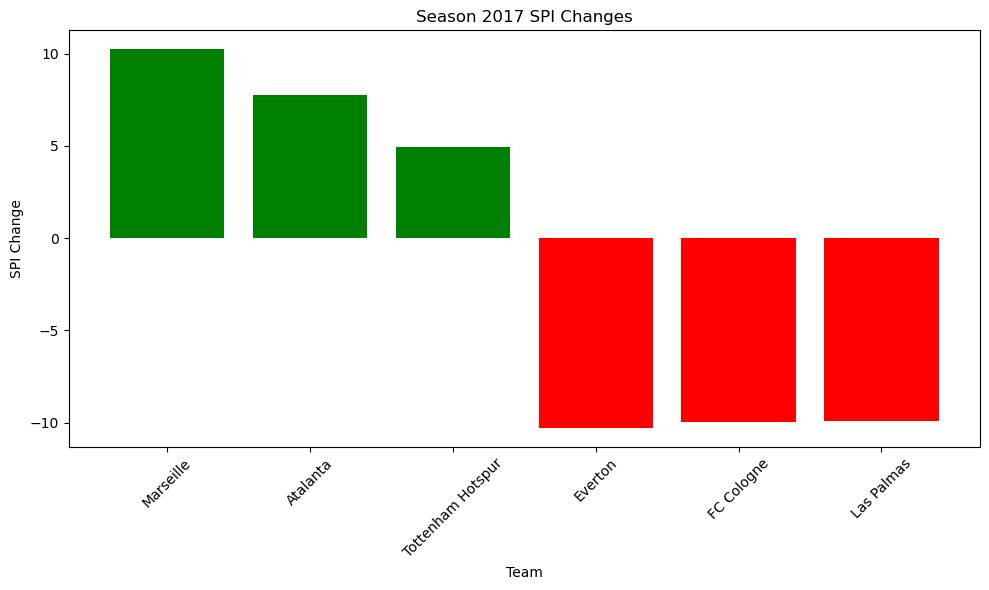

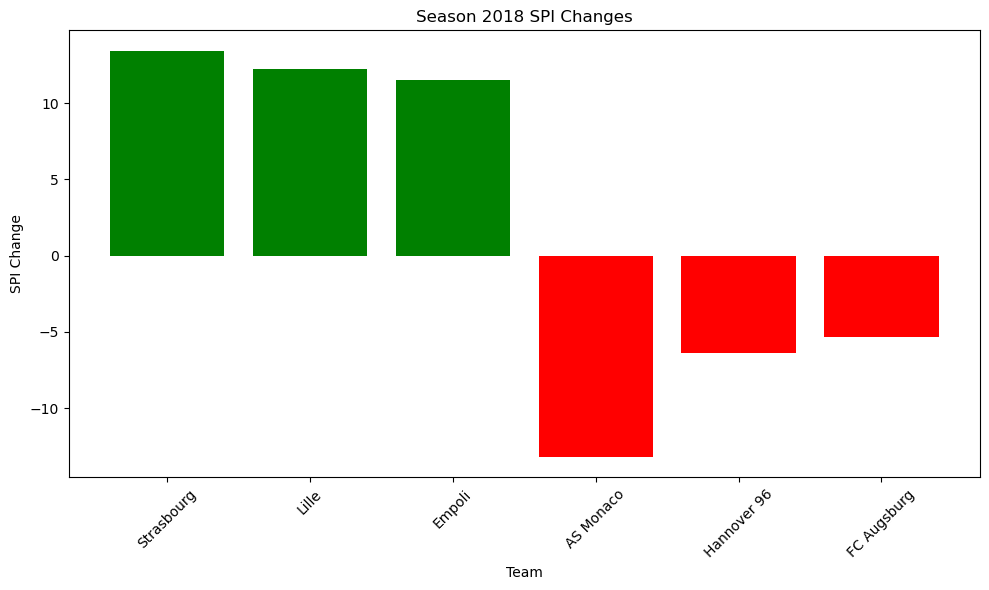

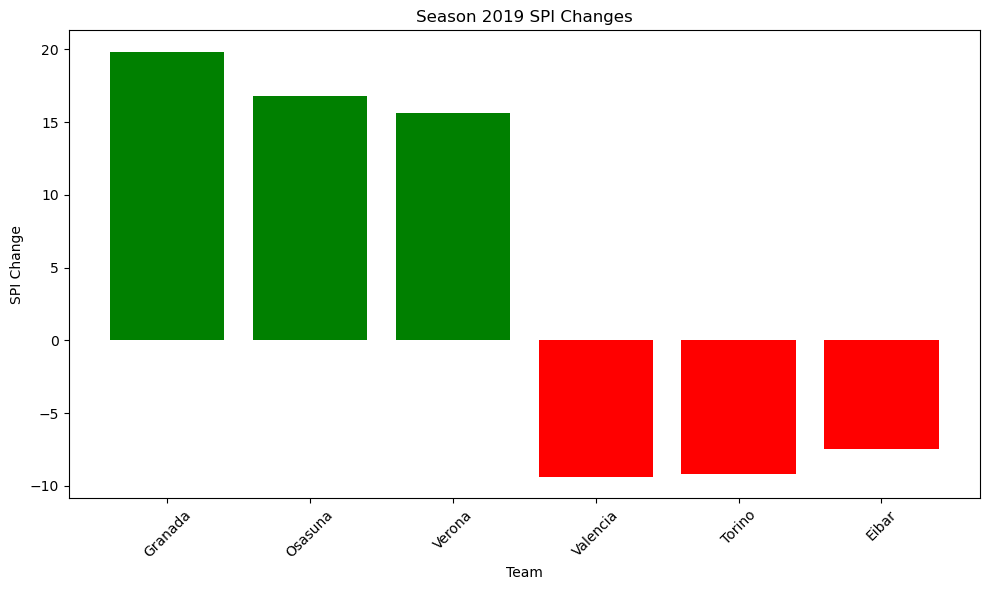

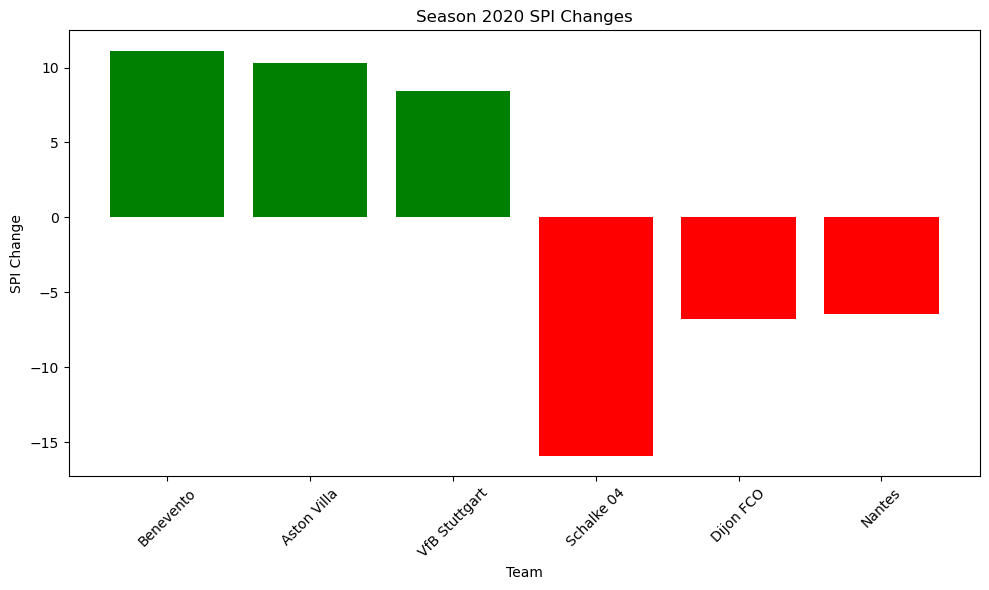

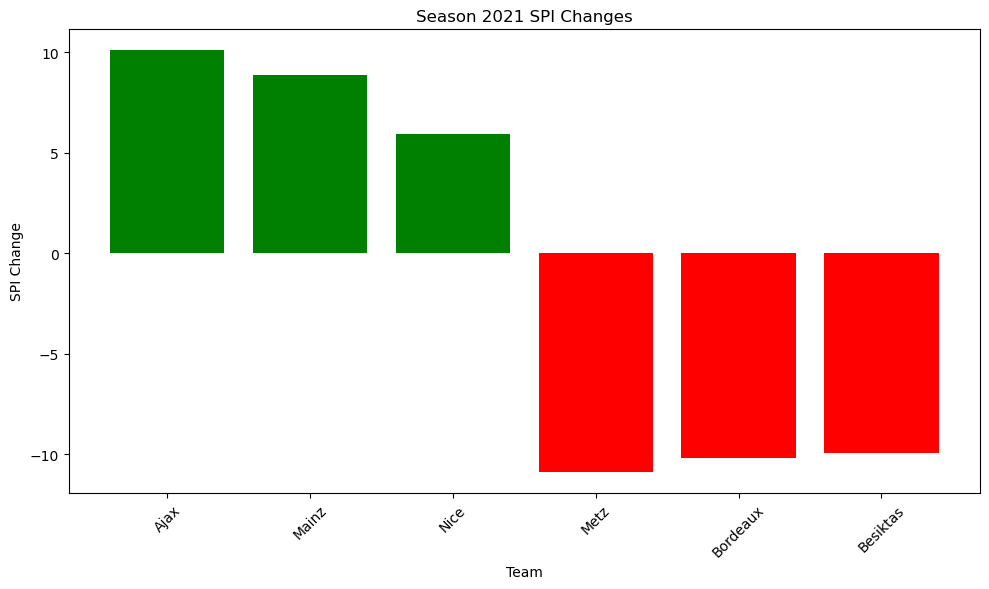

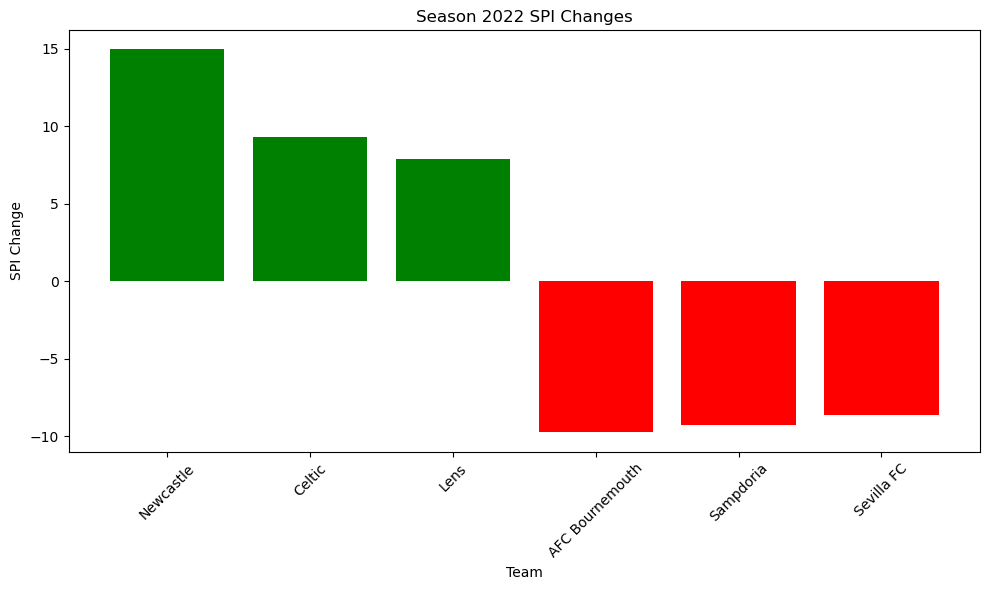

In [14]:
# Create bar charts for the top improved and declined teams for each season
for season in spi_avg_season['season'].unique():
    plt.figure(figsize=(10, 6))
    season_data = spi_avg_season[spi_avg_season['season'] == season]
    top_improved = season_data.nlargest(3, 'spi_change')
    top_declined = season_data.nsmallest(3, 'spi_change')
    top_teams = pd.concat([top_improved, top_declined])
    
    # Create a bar chart
    plt.bar(top_teams['team'], top_teams['spi_change'], color=['green' if x > 0 else 'red' for x in top_teams['spi_change']])
    plt.xlabel('Team')
    plt.ylabel('SPI Change')
    plt.title(f'Season {season} SPI Changes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### How well do underdogs perform? How often do teams with a win + tie probability of 25% actually win or tie? Do these results differ by league?

In [15]:
spi_data_25 = spi_data[(spi_data['prob1']+spi_data['probtie']<=0.25) | 
                       (spi_data['prob2']+spi_data['probtie']<=0.25)].reset_index()
spi_data_25.shape

(1075, 24)

In [16]:
spi_data_25['underdog_win_tie'] =  np.where(((spi_data_25['prob1']+spi_data_25['probtie']<=0.25) & 
                                         ((spi_data_25['score1']>=spi_data_25['score2']))) |
                                          ((spi_data_25['prob2']+spi_data_25['probtie']<=0.25) & 
                                         ((spi_data_25['score2']>=spi_data_25['score1'])))
                                            , 1, 0)

In [17]:
spi_data_25['underdog_win_tie'].sum()

199

In [18]:
pd.set_option('display.max_rows', None)
print(spi_data_25[['prob1', 'prob2','probtie', 'score1','score2','underdog_win_tie']])

       prob1   prob2  probtie  score1  score2  underdog_win_tie
0     0.0463  0.8380   0.1157     0.0     1.0                 0
1     0.8152  0.0525   0.1323     2.0     1.0                 0
2     0.9591  0.0071   0.0337     6.0     2.0                 0
3     0.8277  0.0492   0.1231     3.0     0.0                 0
4     0.8037  0.0395   0.1568     1.0     1.0                 1
5     0.9443  0.0098   0.0459     6.0     0.0                 0
6     0.7775  0.0683   0.1543     2.0     1.0                 0
7     0.8904  0.0284   0.0812     2.0     1.0                 0
8     0.7687  0.0780   0.1534     3.0     1.0                 0
9     0.7657  0.0771   0.1572     1.0     1.0                 1
10    0.9278  0.0132   0.0590     5.0     2.0                 0
11    0.7988  0.0400   0.1612     3.0     1.0                 0
12    0.9657  0.0059   0.0284     1.0     2.0                 1
13    0.0852  0.7589   0.1560     0.0     6.0                 0
14    0.0833  0.7867   0.1299     1.0   

Overall win + tie percentage

total amount of games that the under dog tied or won / total amount of games that had a team's win + tie probability = 0.25

In [19]:
spi_data_25['underdog_win_tie'].sum()/len(spi_data_25)

0.18511627906976744

In [20]:
spi_data_25_league_count = spi_data_25.groupby(['league'],as_index=False).size()

In [21]:
spi_data_25_league_total = spi_data_25.groupby(['league'],as_index=False)['underdog_win_tie'].sum()

In [22]:
spi_data_25_grouped = spi_data_25_league_total.merge(spi_data_25_league_count,how='inner',on='league')

In [23]:
spi_data_25_grouped['win_tie_percentage'] = (spi_data_25_grouped['underdog_win_tie']/spi_data_25_grouped['size'])*100

In [24]:
spi_data_25_grouped

league  underdog_win_tie  size  win_tie_percentage
0   Barclays Premier League                48   292           16.438356
1            French Ligue 1                22   151           14.569536
2         German Bundesliga                42   179           23.463687
3             Italy Serie A                33   190           17.368421
4  Spanish Primera Division                39   180           21.666667
5     UEFA Champions League                15    83           18.072289

In [25]:
spi_data_25_grouped.to_csv('underdog_output.csv')

Text(0.5, 1.0, 'Underdog Win+Tie Percentage by League 2016-2022')

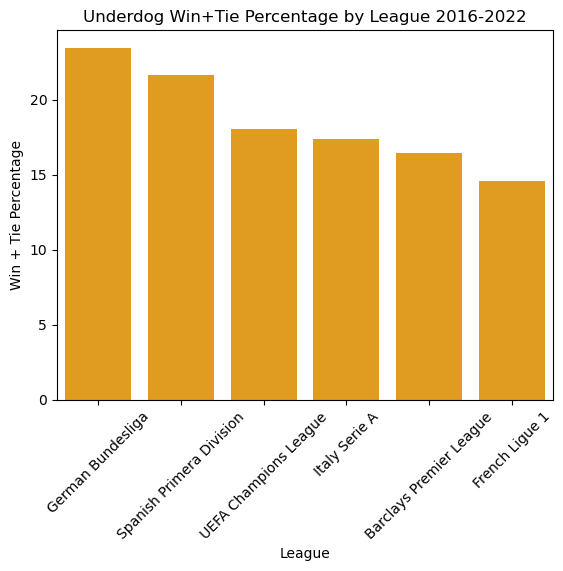

In [26]:
spi_data_25_grouped_sorted = spi_data_25_grouped.sort_values('win_tie_percentage',ascending=False)
sns.barplot(x='league', y="win_tie_percentage", data=spi_data_25_grouped_sorted,color='orange')
plt.xticks(rotation=45)
plt.ylabel("Win + Tie Percentage")
plt.xlabel("League")
plt.title("Underdog Win+Tie Percentage by League 2016-2022")


Making a bar plot to visualize the results

### Does a home field advantage exist in soccer?

In [27]:
# Calculating home and away win probabilities, and goal rates
spi_data['HomeWinProbability'] = spi_data['prob1']
spi_data['AwayWinProbability'] = spi_data['prob2']
spi_data['HomeGoalRate'] = spi_data['xg1'] / spi_data['proj_score1']
spi_data['AwayGoalRate'] = spi_data['xg2'] / spi_data['proj_score2']


In [28]:
# Calculating the difference between home and away performance
spi_data['WinProbabilityDifference'] = spi_data['HomeWinProbability'] - spi_data['AwayWinProbability']
spi_data['GoalRateDifference'] = spi_data['HomeGoalRate'] - spi_data['AwayGoalRate']

In [29]:
# Display relevant columns for analysis
result_columns = ['season', 'date', 'league', 'team1', 'team2',
                  'HomeWinProbability', 'AwayWinProbability', 'WinProbabilityDifference',
                  'HomeGoalRate', 'AwayGoalRate', 'GoalRateDifference',
                  'score1', 'score2']

In [30]:
# Print the results for analysis
print(spi_data[result_columns])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



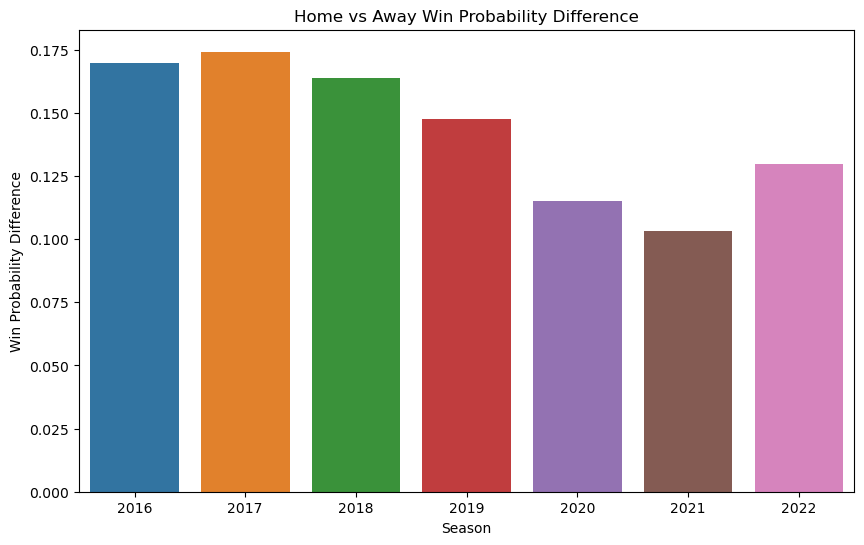

In [31]:
# Visualize Win Probability Difference
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='WinProbabilityDifference', data=spi_data, ci=None)
plt.title('Home vs Away Win Probability Difference')
plt.xlabel('Season')
plt.ylabel('Win Probability Difference')
plt.show()

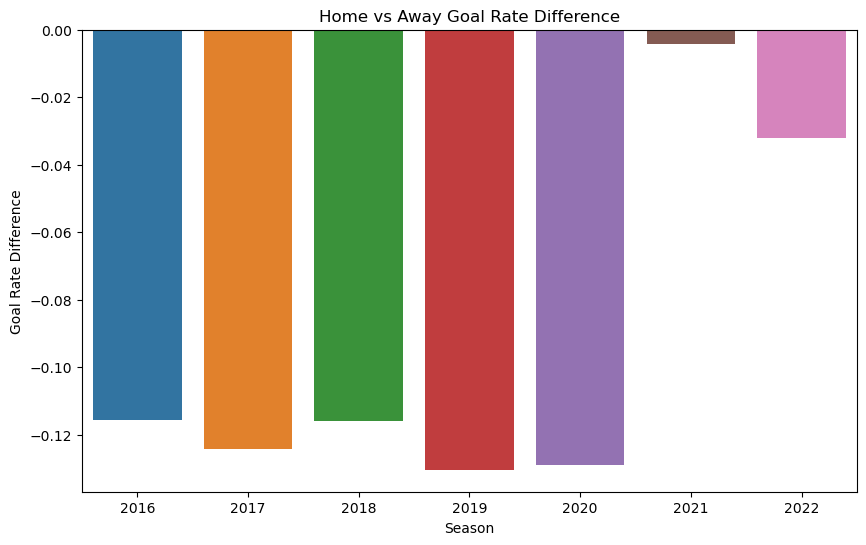

In [32]:
# Visualize Goal Rate Difference
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='GoalRateDifference', data=spi_data, ci=None)
plt.title('Home vs Away Goal Rate Difference')
plt.xlabel('Season')
plt.ylabel('Goal Rate Difference')
plt.show()